<a href="https://colab.research.google.com/github/LeonimerMelo/python/blob/main/Dollar_Exchange_Rate_Future_Forcasting_(RNN)_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RNN Dollar Exchange Rate Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/cot_dolar_s071994.csv'
df = pd.read_csv(path)
df.head(10)
# a data está em formato 'd/m/Y'

,date,value
0,01/07/1994,0.900
1,04/07/1994,0.935
2,05/07/1994,0.927
3,06/07/1994,0.910
4,07/07/1994,0.905
5,08/07/1994,0.915
6,11/07/1994,0.920
7,12/07/1994,0.915
8,13/07/1994,0.915
9,14/07/1994,0.920


In [ ]:
df['Date']=pd.to_datetime(df['date'].astype(str), format='%d/%m/%Y')
df

,date,value,Date
0,01/07/1994,0.9000,1994-07-01
1,04/07/1994,0.9350,1994-07-04
2,05/07/1994,0.9270,1994-07-05
3,06/07/1994,0.9100,1994-07-06
4,07/07/1994,0.9050,1994-07-07
...,...,...,...
7483,26/04/2024,5.1178,2024-04-26
7484,29/04/2024,5.1149,2024-04-29
7485,30/04/2024,5.1712,2024-04-30
7486,02/05/2024,5.1178,2024-05-02


In [ ]:
del df['date']
df

,value,Date
0,0.9000,1994-07-01
1,0.9350,1994-07-04
2,0.9270,1994-07-05
3,0.9100,1994-07-06
4,0.9050,1994-07-07
...,...,...
7483,5.1178,2024-04-26
7484,5.1149,2024-04-29
7485,5.1712,2024-04-30
7486,5.1178,2024-05-02


In [ ]:
# trocando as colunas de lugar
usd = df[['Date','value']].copy()
usd.head(10)

,Date,value
0,1994-07-01,0.900
1,1994-07-04,0.935
2,1994-07-05,0.927
3,1994-07-06,0.910
4,1994-07-07,0.905
5,1994-07-08,0.915
6,1994-07-11,0.920
7,1994-07-12,0.915
8,1994-07-13,0.915
9,1994-07-14,0.920


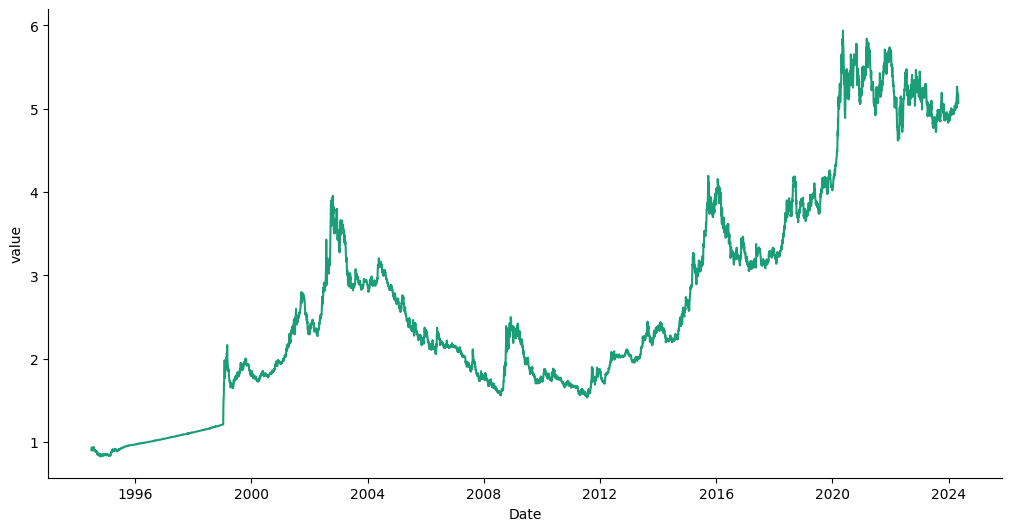

In [ ]:
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['value']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = usd.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('value')
plt.show()

In [ ]:
# excluo dados até janeiro de 1999
usd2=usd[1140:].copy()
usd2

,Date,value
1140,1999-01-21,1.6594
1141,1999-01-22,1.7041
1142,1999-01-25,1.7598
1143,1999-01-26,1.8762
1144,1999-01-27,1.8878
...,...,...
7483,2024-04-26,5.1178
7484,2024-04-29,5.1149
7485,2024-04-30,5.1712
7486,2024-05-02,5.1178


In [ ]:
dataset_total = usd2.rename(columns={'value': 'Open', 'Date': 'date'}).copy()
dataset_total

,date,Open
1140,1999-01-21,1.6594
1141,1999-01-22,1.7041
1142,1999-01-25,1.7598
1143,1999-01-26,1.8762
1144,1999-01-27,1.8878
...,...,...
7483,2024-04-26,5.1178
7484,2024-04-29,5.1149
7485,2024-04-30,5.1712
7486,2024-05-02,5.1178


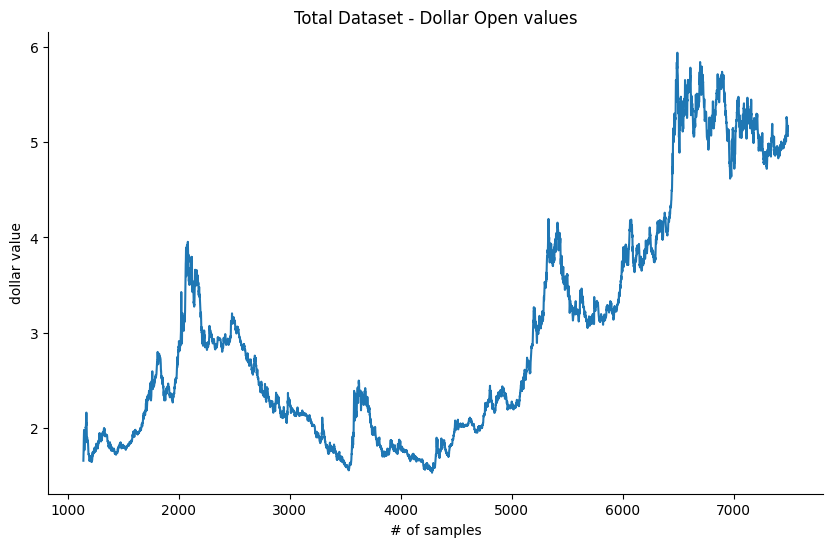

In [ ]:
dataset_total['Open'].plot(kind='line', figsize=(10, 6), title='Total Dataset - Dollar Open values')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('# of samples')
plt.ylabel('dollar value')
plt.show()

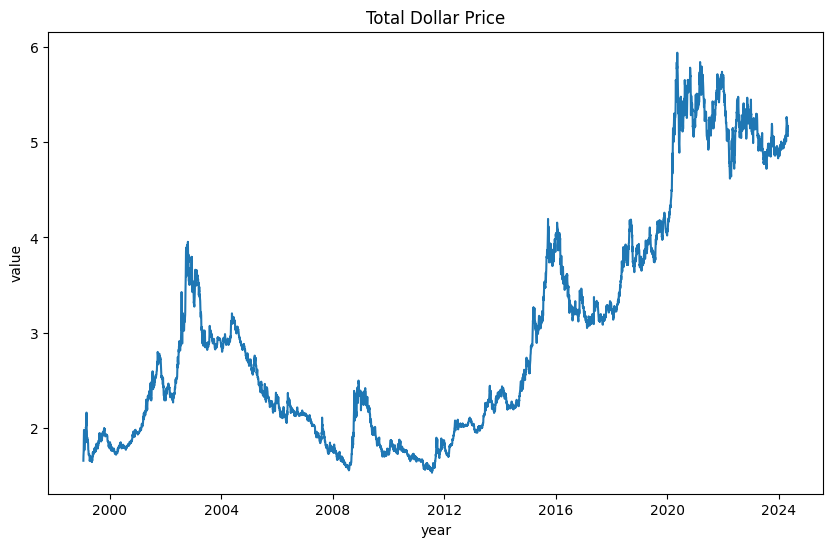

In [ ]:
xs = dataset_total['date']
ys = dataset_total['Open']
xs = np.asarray(xs, dtype='datetime64[s]')
plt.figure(figsize=(10,6))
plt.title('Total Dollar Price')
plt.ylabel('value')
plt.xlabel('year')
plt.plot(xs, ys)
plt.show()

In [ ]:
# Loading train dataset == total dataset - (dataset_test_len) last samples
dataset_test_len = 60
dataset_train = dataset_total[:-dataset_test_len]
dataset_train

,date,Open
1140,1999-01-21,1.6594
1141,1999-01-22,1.7041
1142,1999-01-25,1.7598
1143,1999-01-26,1.8762
1144,1999-01-27,1.8878
...,...,...
7423,2024-01-30,4.9632
7424,2024-01-31,4.9529
7425,2024-02-01,4.9344
7426,2024-02-02,4.9465


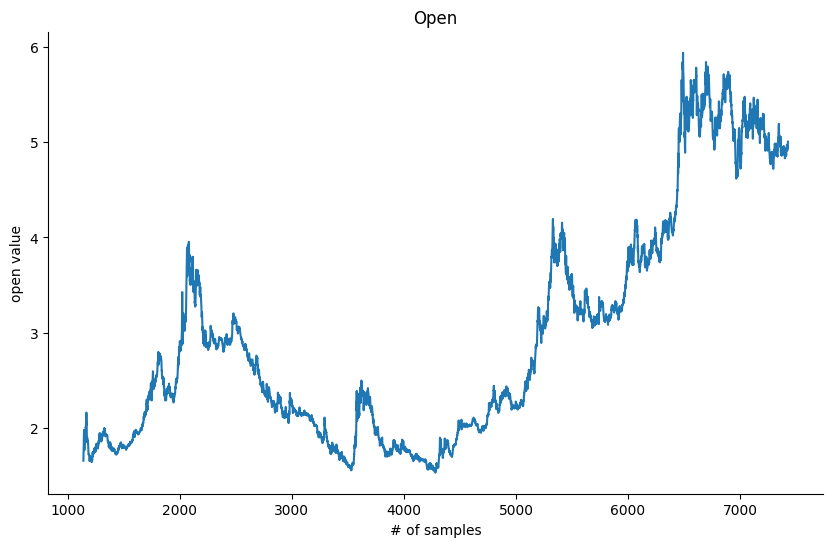

In [ ]:
dataset_train['Open'].plot(kind='line', figsize=(10, 6), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('# of samples')
plt.ylabel('open value')
plt.show()

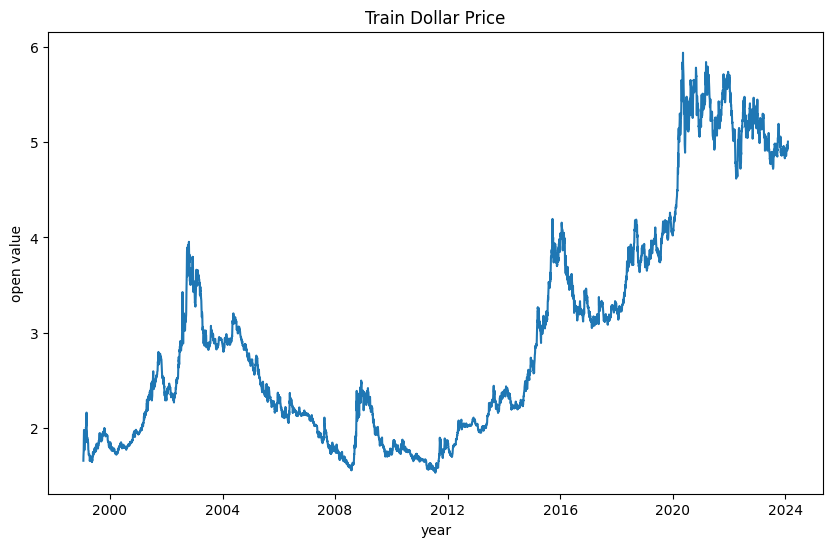

In [ ]:
xs = dataset_train['date']
ys = dataset_train['Open']
xs = np.asarray(xs, dtype='datetime64[s]')
plt.figure(figsize=(10,6))
plt.title('Train Dollar Price')
plt.ylabel('open value')
plt.xlabel('year')
plt.plot(xs, ys)
plt.show()

In [ ]:
# extract 'Open' column
train = dataset_train.Open.values.reshape(-1, 1)
# another way to do same
# train = dataset_train.loc[:, ['Open']].values
train

array([[1.6594],
       [1.7041],
       [1.7598],
       ...,
       [4.9344],
       [4.9465],
       [5.0047]])

In [ ]:
train.shape

(6288, 1)

In [ ]:
# Feature MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)

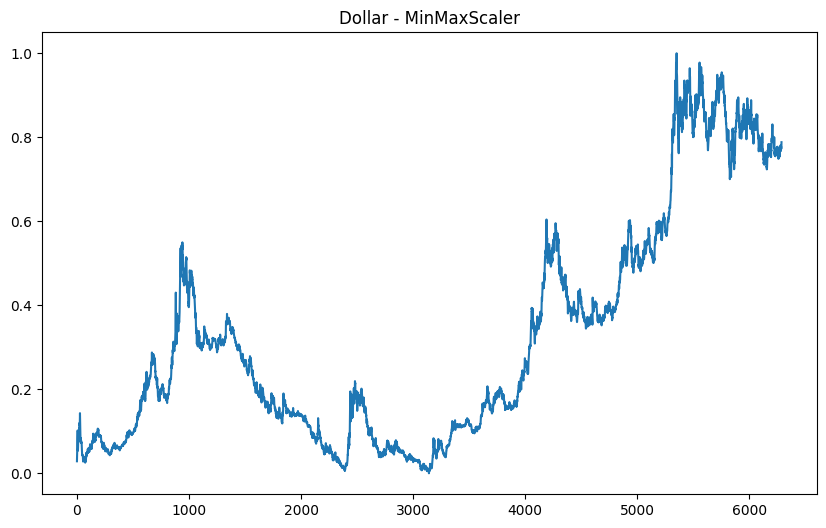

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_scaled)
plt.title('Dollar - MinMaxScaler')
plt.show()

In [ ]:
# Create Data Structure
X_train = []
y_train = []
# 50 amostras em cada vetor
timesteps = 50
# obtem 1208 conjunto com 50 amostras cada com passo = 1
for i in range(timesteps, len(dataset_train)):
    # X_train = 6238 vetores com 50 amostras cada
    X_train.append(train_scaled[i - timesteps:i, 0])
    # y_train = próximo valor (51) que será o valor futuro
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(6238, 50)

In [ ]:
y_train.shape

(6238,)

In [ ]:
train_scaled[0][0]

0.028549365191124

In [ ]:
X_train[0][0]

0.028549365191124

In [ ]:
i=50
train_scaled[i - timesteps:i, 0]

array([0.02854937, 0.03870176, 0.05135252, 0.07778964, 0.08042427,
       0.0876922 , 0.1019101 , 0.09750392, 0.05984692, 0.05369188,
       0.06348089, 0.06750097, 0.07413296, 0.09057667, 0.08194599,
       0.08001544, 0.08265007, 0.08707897, 0.08367213, 0.08773763,
       0.09109905, 0.10863295, 0.10647528, 0.11369779, 0.12044334,
       0.11217607, 0.13543346, 0.14313294, 0.12893775, 0.10422676,
       0.09909378, 0.08428536, 0.07463263, 0.07810761, 0.0841718 ,
       0.07903882, 0.07213428, 0.07794862, 0.0738377 , 0.0718163 ,
       0.07426923, 0.07202071, 0.07002203, 0.0625724 , 0.05462309,
       0.05246542, 0.04517477, 0.04258557, 0.04328965, 0.04472053])

In [ ]:
train_scaled[i, 0]

0.044288991346612405

##Recurrent Neural Networks (RNN)

Let’s look at the architecture of the RNN unit. It takes input from the previous step and current input. Here tanh is the activation function, instead of tanh you can use other activation function as well.

RNN’s face short-term memory problem. It is caused due to vanishing gradient problem. As RNN processes more steps it suffers from vanishing gradient more than other neural network architectures.
<center><img src='https://miro.medium.com/v2/resize:fit:640/format:webp/0*eRJCRsikdGGu8ffA.png' width=400></center>

##Gated Recurrent Units (GRU)
The workflow of GRU is same as RNN but the difference is in the operations inside the GRU unit. Let’s see the architecture of it.

<center><img src='https://miro.medium.com/v2/resize:fit:828/format:webp/1*RiOzdOVaaeKrUotY7-1a2A.png' width=500></center>

Inside GRU it has two gates: **reset gate** and **update gate**. Gates are nothing but neural networks, each gate has its own weights and biases(but don’t forget that weights and bias for all nodes in one layer are same).

##Long Short-Term Memory (LSTM)

LSTMs are pretty much similar to GRU’s, they are also intended to solve the vanishing gradient problem. Additional to GRU here there are 2 more gates: **forget gate** and **output gate**.

<center><img src='https://miro.medium.com/v2/resize:fit:828/format:webp/1*lSDKRennQMpJFL4xxJHloQ.png' width=500></center>

In [ ]:
# Create RNN Model

#import libraries and packages:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, InputLayer, Dense, Dropout
from keras import backend as K
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

K.clear_session()

#Initialize RNN:
regressor = Sequential(name='RNN')
regressor.add(InputLayer((X_train.shape[1], 1)))

#Adding the first RNN layer and some Dropout regularization
# return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence. Default: False.
# regressor.add(LSTM(units = 50, activation='tanh', return_sequences=True))
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
#regressor.add(SimpleRNN(50))
# regressor.add(LSTM(50))
#regressor.add(GRU(50))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
# regressor.add(LSTM(units = 50, activation='tanh', return_sequences=True))
# regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
# regressor.add(Dropout(0.2))

# #Adding the third RNN layer and some Dropout regularization
# regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
# regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
# regressor.add(LSTM(units = 50))
regressor.add(SimpleRNN(units = 50))
# regressor.add(Dropout(0.2))

regressor.add(Dense(8, 'relu'))
# regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(1, 'linear'))

In [ ]:
#Compile the RNN
#regressor.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
regressor.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
regressor.summary()

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 50)            2600      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense (Dense)               (None, 8)                 408       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8067 (31.51 KB)
Trainable params: 8067 (31.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Fitting the RNN to the Training set
h=regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
195/195 [==============================] - 7s 23ms/step - loss: 0.0041 - root_mean_squared_error: 0.0641
Epoch 2/10
195/195 [==============================] - 6s 30ms/step - loss: 5.1239e-04 - root_mean_squared_error: 0.0226
Epoch 3/10
195/195 [==============================] - 6s 30ms/step - loss: 3.2733e-04 - root_mean_squared_error: 0.0181
Epoch 4/10
195/195 [==============================] - 7s 37ms/step - loss: 2.7742e-04 - root_mean_squared_error: 0.0167
Epoch 5/10
195/195 [==============================] - 6s 33ms/step - loss: 2.2990e-04 - root_mean_squared_error: 0.0152
Epoch 6/10
195/195 [==============================] - 4s 22ms/step - loss: 1.9551e-04 - root_mean_squared_error: 0.0140
Epoch 7/10
195/195 [==============================] - 5s 24ms/step - loss: 1.7758e-04 - root_mean_squared_error: 0.0133
Epoch 8/10
195/195 [==============================] - 6s 33ms/step - loss: 1.6039e-04 - root_mean_squared_error: 0.0127
Epoch 9/10
195/195 [========================

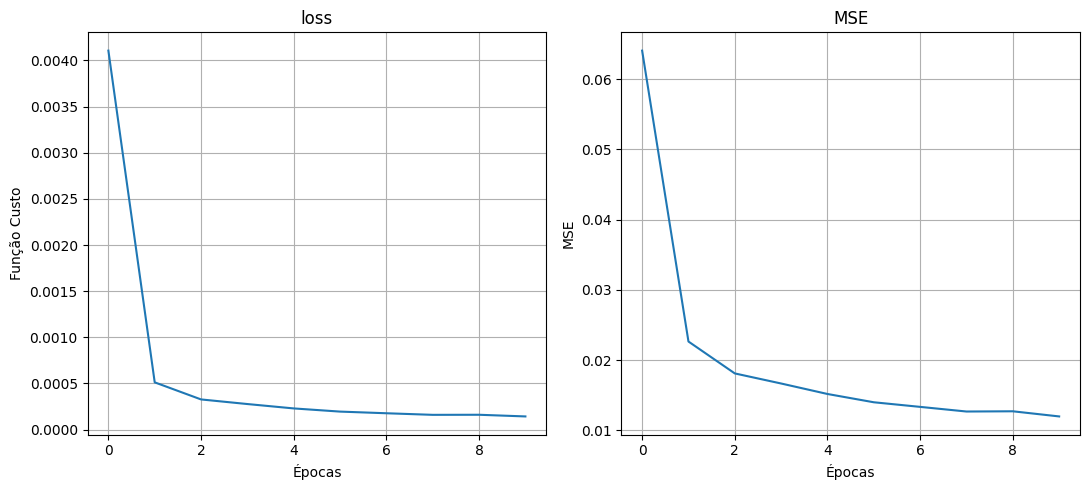

In [ ]:
# plt.plot(h.history['loss'])
# plt.plot(h.history['root_mean_squared_error'])
# plt.xlabel('Épocas')
# plt.ylabel('Função Custo')
# plt.title('loss')
# plt.grid()
# plt.show()

plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
plt.plot(h.history['loss'])
plt.xlabel('Épocas')
plt.ylabel('Função Custo')
plt.title('loss')
plt.xticks()
plt.yticks()
plt.grid()
plt.subplot(1,2,2)
plt.plot(h.history['root_mean_squared_error'])
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.title('MSE')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
# make predictions
trainPredict = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
trainPredict = regressor.predict(trainPredict)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

195/195 [==============================] - 2s 11ms/step
Train Score: 0.06 RMSE


In [ ]:
dataset_total.tail(10)

,date,Open
7478,2024-04-19,5.2263
7479,2024-04-22,5.2037
7480,2024-04-23,5.1620
7481,2024-04-24,5.1586
7482,2024-04-25,5.1673
7483,2024-04-26,5.1178
7484,2024-04-29,5.1149
7485,2024-04-30,5.1712
7486,2024-05-02,5.1178
7487,2024-05-03,5.0662


In [ ]:
# load test dataset == last (dataset_test_len) samples of total dataset
dataset_test = dataset_total[-dataset_test_len:].copy()
dataset_test.tail(5)

,date,Open
7483,2024-04-26,5.1178
7484,2024-04-29,5.1149
7485,2024-04-30,5.1712
7486,2024-05-02,5.1178
7487,2024-05-03,5.0662


In [ ]:
len(dataset_test)

60

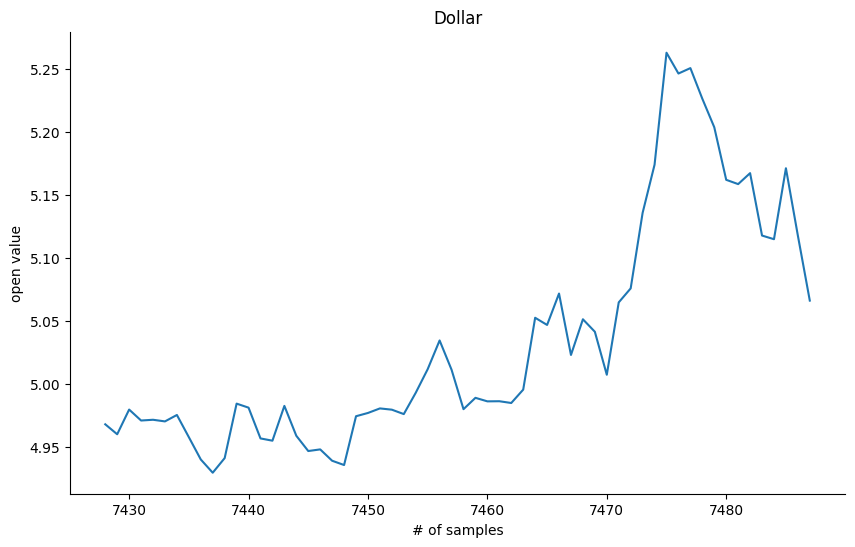

In [ ]:
dataset_test['Open'].plot(kind='line', figsize=(10, 6), title='Dollar')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('# of samples')
plt.ylabel('open value')
plt.show()

In [ ]:
# extract 'Open' column of test dataset
real_test_price = dataset_test.Open.values.reshape(-1, 1)
# another way to do same
# real_test_price = dataset_test.loc[:, ['Open']].values
real_test_price.shape

(60, 1)

In [ ]:
# take just 'Open' column of total dataset
dst = dataset_total['Open']
dst

1140    1.6594
1141    1.7041
1142    1.7598
1143    1.8762
1144    1.8878
         ...  
7483    5.1178
7484    5.1149
7485    5.1712
7486    5.1178
7487    5.0662
Name: Open, Length: 6348, dtype: float64

In [ ]:
# pego as 110 últimas amostras do dataset total (coluna Open) para que eu possa utilizar o
# timesteps = 50 e varrer 60 posições finais do banco de dados
inputs = dst[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs.shape

(110, 1)

In [ ]:
dst[-1:]

7487    5.0662
Name: Open, dtype: float64

In [ ]:
# último dado de inputs == último dado do dst
inputs[-1:]

array([[5.0662]])

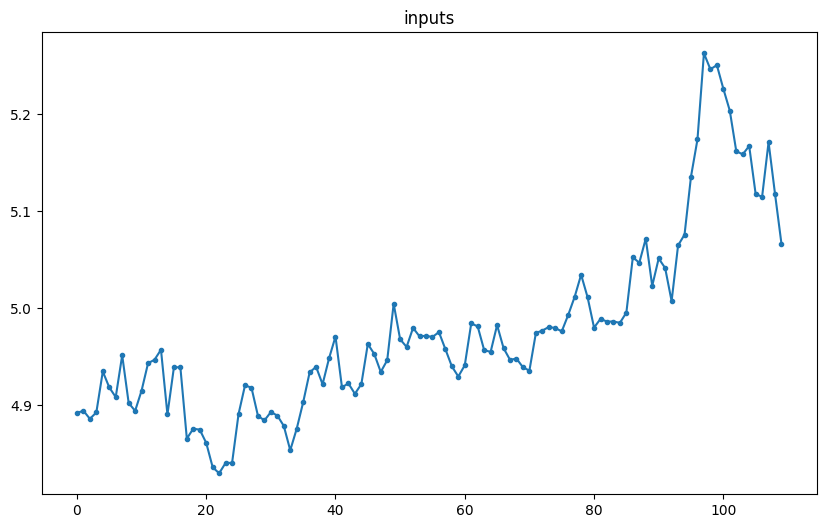

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(inputs, '.-')
plt.title('inputs')
plt.show()

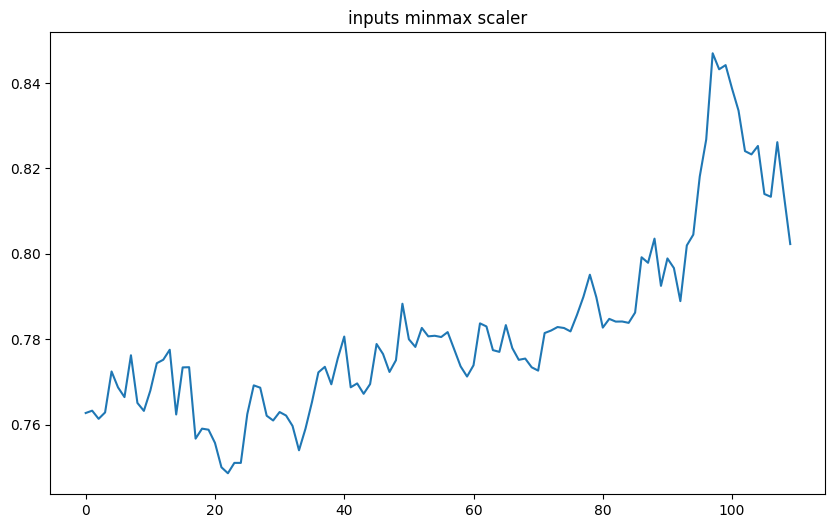

In [ ]:
# aplico minmax scaler que foi utilizado anteriormente, para se manter a proporção de deslocamento original
inputs_sc = scaler.transform(inputs)
plt.figure(figsize=(10, 6))
plt.title('inputs minmax scaler')
plt.plot(inputs_sc)
plt.show()

In [ ]:
# monto a matriz X_test com 60 conjuntos de 50 amostras cada
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs_sc[i-timesteps:i,0])
X_test = np.array(X_test)

In [ ]:
X_test.shape

(60, 50)

In [ ]:
X_test[0]

array([0.76276999, 0.76331509, 0.76140725, 0.76290627, 0.77249086,
       0.76876604, 0.76649481, 0.77628381, 0.76513207, 0.76326966,
       0.76801653, 0.7744214 , 0.77523905, 0.77757841, 0.76242931,
       0.77344478, 0.7734902 , 0.75677394, 0.75911331, 0.75886348,
       0.7557746 , 0.75007381, 0.74866565, 0.75109587, 0.75109587,
       0.76252016, 0.769243  , 0.7686979 , 0.76213405, 0.76102115,
       0.76299712, 0.76217947, 0.75974926, 0.75404847, 0.7590906 ,
       0.76529106, 0.77228645, 0.77358105, 0.76949283, 0.77555702,
       0.78066729, 0.76878875, 0.76969724, 0.76726703, 0.76953826,
       0.77891844, 0.77657907, 0.7723773 , 0.77512549, 0.78834405])

In [ ]:
# reshape para ficar compatível com a entrada da rede RNN
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

(60, 50, 1)

In [ ]:
# Getting the predicted stock price
predicted_price = regressor.predict(X_test)

2/2 [==============================] - 0s 16ms/step


In [ ]:
predicted_price.shape

(60, 1)

In [ ]:
# reverto a escala para os valores originais
predicted_price_inv = scaler.inverse_transform(predicted_price)

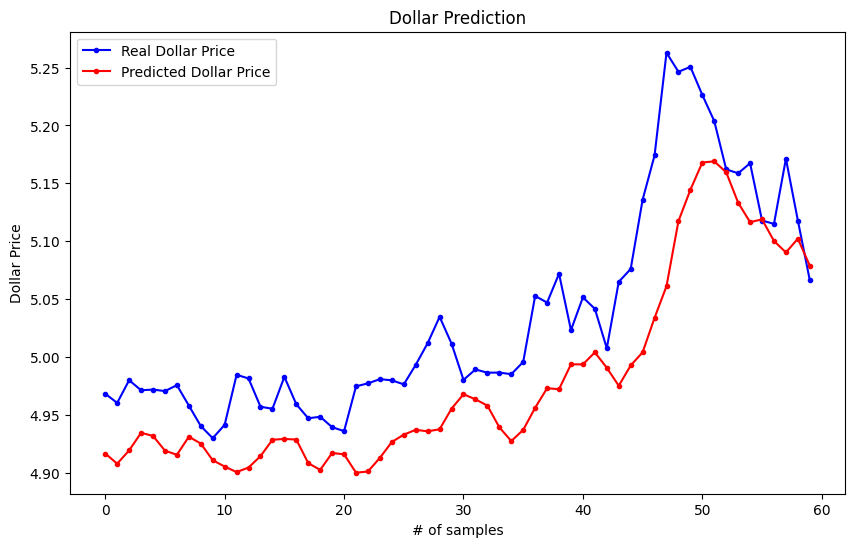

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(real_test_price, '.-', color='blue', label='Real Dollar Price')
plt.plot(predicted_price_inv, '.-', color='red', label='Predicted Dollar Price')
plt.title('Dollar Prediction')
plt.xlabel('# of samples')
plt.ylabel('Dollar Price')
plt.legend()
plt.show()

In [ ]:
X_test.shape

(60, 50, 1)

In [ ]:
X_test[-1:]

array([[[0.77130982],
        [0.77394445],
        [0.78375616],
        [0.78302937],
        [0.77748757],
        [0.77707874],
        [0.78334734],
        [0.77796452],
        [0.77521633],
        [0.77551159],
        [0.77346749],
        [0.77269527],
        [0.78148493],
        [0.78207545],
        [0.78289309],
        [0.78266597],
        [0.78187104],
        [0.78570942],
        [0.78995662],
        [0.79513502],
        [0.78986577],
        [0.78275682],
        [0.78480093],
        [0.78416498],
        [0.78418769],
        [0.78386972],
        [0.78627723],
        [0.79922324],
        [0.79792864],
        [0.803584  ],
        [0.79252311],
        [0.79895069],
        [0.79670217],
        [0.78895728],
        [0.80199414],
        [0.80451521],
        [0.81811988],
        [0.82679598],
        [0.8469645 ],
        [0.84321697],
        [0.8441936 ],
        [0.83867451],
        [0.83354153],
        [0.8240705 ],
        [0.82329828],
        [0

In [ ]:
# Let's make future predictions beyond test dataset
y_future = []
# vamos utilizar o banco de dados de teste para inserir valores futuros preditos
x_past = X_test[-1:]
# 30 amostras de predições futuras
n_future = 30

for i in range(n_future):

    # generate the next forecast
    y_past = regressor.predict(x_past, verbose=0)

    # save the forecast
    y_future.append(y_past.flatten()[0])

    # feed the last forecast back to the model as an input
    x_past = np.append(x_past[:, 1:, :], y_past.reshape(1, 1, 1), axis=1)

In [ ]:
len(y_future)

30

In [ ]:
x_past[-1:]

array([[[0.79252311],
        [0.79895069],
        [0.79670217],
        [0.78895728],
        [0.80199414],
        [0.80451521],
        [0.81811988],
        [0.82679598],
        [0.8469645 ],
        [0.84321697],
        [0.8441936 ],
        [0.83867451],
        [0.83354153],
        [0.8240705 ],
        [0.82329828],
        [0.82527425],
        [0.81403166],
        [0.813373  ],
        [0.82616003],
        [0.81403166],
        [0.82378352],
        [0.82443053],
        [0.82531244],
        [0.8263098 ],
        [0.82736808],
        [0.82846063],
        [0.82957423],
        [0.83070236],
        [0.83184177],
        [0.83299154],
        [0.83415067],
        [0.83531886],
        [0.83649606],
        [0.83768225],
        [0.83887768],
        [0.84008229],
        [0.8412959 ],
        [0.8425191 ],
        [0.84375155],
        [0.84499341],
        [0.84624493],
        [0.84750611],
        [0.84877694],
        [0.85005754],
        [0.85134816],
        [0

In [ ]:
y_future

[0.8237835,
 0.8244305,
 0.82531244,
 0.8263098,
 0.8273681,
 0.82846063,
 0.8295742,
 0.83070236,
 0.83184177,
 0.83299154,
 0.8341507,
 0.83531886,
 0.83649606,
 0.83768225,
 0.8388777,
 0.8400823,
 0.8412959,
 0.8425191,
 0.84375155,
 0.8449934,
 0.84624493,
 0.8475061,
 0.84877694,
 0.85005754,
 0.85134816,
 0.85264856,
 0.85395914,
 0.8552799,
 0.8566108,
 0.857952]

In [ ]:
y_future_ = np.asarray(y_future).reshape(-1,1)
y_future_.shape

(30, 1)

In [ ]:
# future prediction rescaled
y_future_inv = scaler.inverse_transform(y_future_)

In [ ]:
y_future_.shape

(30, 1)

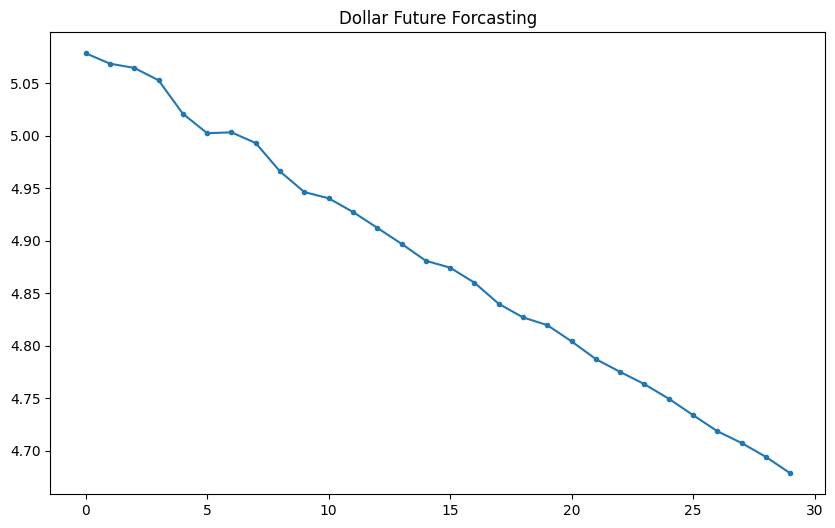

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_future_inv, '.-')
plt.title('Dollar Future Forcasting')
plt.show()

In [ ]:
pred_final = np.concatenate((predicted_price, y_future_), axis=0)
pred_final.shape

(90, 1)

In [ ]:
pred_final_inv = scaler.inverse_transform(pred_final)

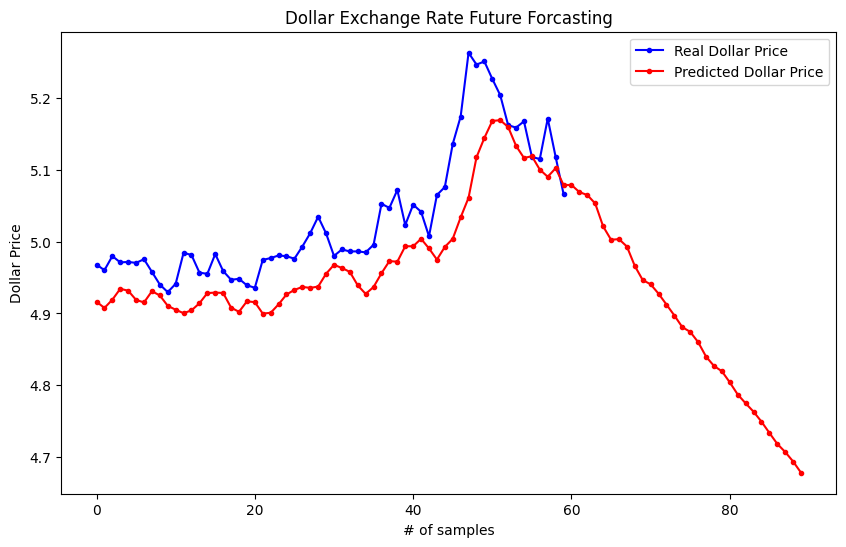

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(real_test_price, '.-', color='blue', label='Real Dollar Price')
plt.plot(pred_final_inv, '.-', color='red', label='Predicted Dollar Price')
plt.title('Dollar Exchange Rate Future Forcasting')
plt.xlabel('# of samples')
plt.ylabel('Dollar Price')
plt.legend()
plt.show()

In [ ]:
# cotação do dolar a partir de 02/05/2024
dolar_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/cot_dolar_05_24.csv')
dolar_['Date']=pd.to_datetime(dolar_['date'].astype(str), format='%d/%m/%Y')
del dolar_['date']
dolar = dolar_[['Date','value']].copy()
dolar.head(10)

,Date,value
0,2024-05-02,5.1178
1,2024-05-03,5.0662
2,2024-05-06,5.0721
3,2024-05-07,5.0604
4,2024-05-08,5.0881
5,2024-05-09,5.1571
6,2024-05-10,5.1458
7,2024-05-13,5.1406
8,2024-05-14,5.1350
9,2024-05-15,5.1417


In [ ]:
len(dolar)

31

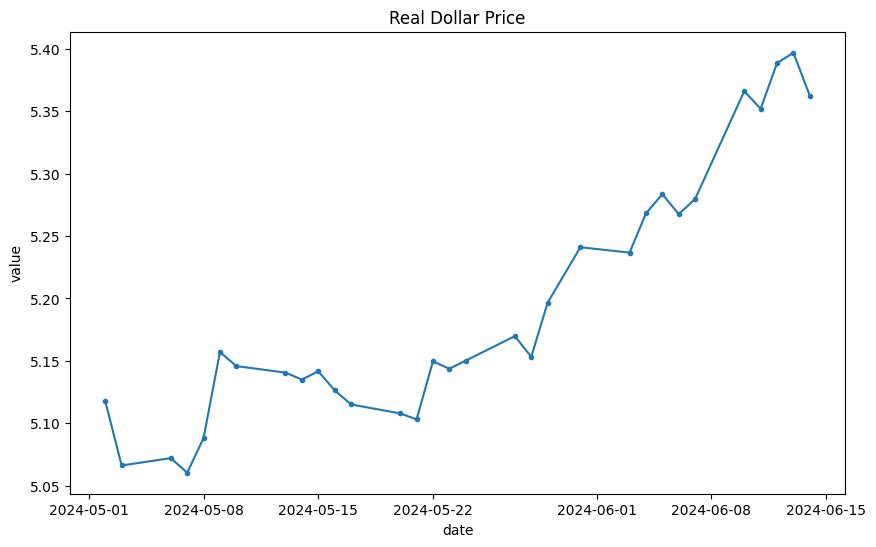

In [ ]:
xs = dolar['Date']
ys = dolar['value']
xs = np.asarray(xs, dtype='datetime64[D]')
plt.figure(figsize=(10,6))
plt.title('Real Dollar Price')
plt.ylabel('value')
plt.xlabel('date')
plt.plot(xs, ys, '.-')
plt.show()

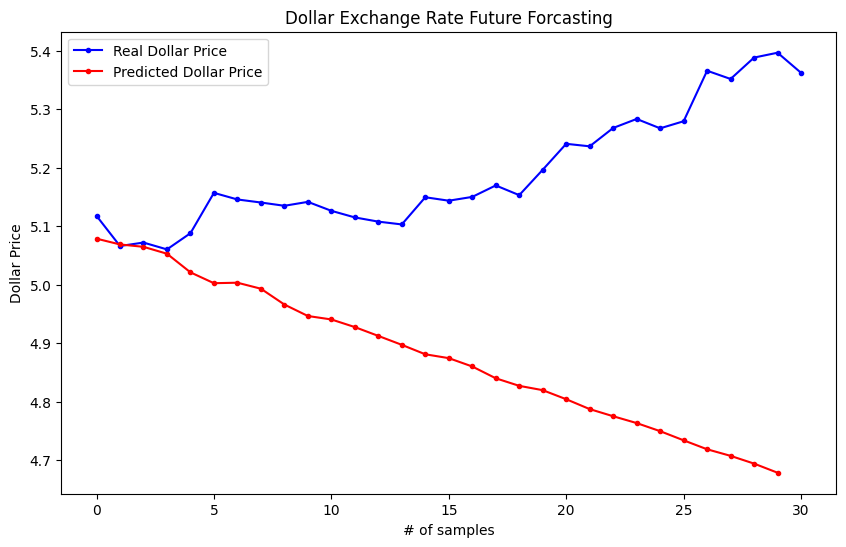

In [ ]:
ys = dolar['value']
plt.figure(figsize=(10, 6))
plt.plot(ys, '.-', color='blue', label='Real Dollar Price')
plt.plot(y_future_inv, '.-', color='red', label='Predicted Dollar Price')
plt.title('Dollar Exchange Rate Future Forcasting')
plt.xlabel('# of samples')
plt.ylabel('Dollar Price')
plt.legend()
plt.show()

##Exercícios
1) Treine os modelos de rede utilizando simpleRNN, GRU e LSTM:
*   com uma camada de entrada (units = 10, 30, 50 e 100) e uma camada de saída (units = 1)
*   Com uma camada de entrada e uma camada oculta
*   Com uma camada de entrada e várias camadas ocultas
* Com adição de regularização Dropout entre as camadas (rate = 0.1, 0.2, 0.3 e 0.5)

2) Plote num único gráfico os valores da função perda (loss) e do MSE obtidos no histórico de treinamento dos modelos testados.

3) Plote num histograma o MSE das predições do banco de dados de treinamento e de testes dos modelos testados.

4) Altere o tamanho do vetor de dados de testes (dataset_test_len = 30, 100 200 e 500) e compare os resultados.

5) Modifique o intervalos de tempo (timesteps = 30, 80, 150) e compare os resultados.

6) Proceda a sintonia da rede alterando os hiperparâmetros: função de ativação, learning_rate, optimizer (Adam, RMSProp, SGD), epochs e batch_size, buscando uma otimização das métricas e dos resultados de previsões. Comente e compare os resultados.

7) Faça suas próprias modificações que achar mais conveniente no sentido de projetar o melhor modelo que obtenha os melhores resultados para predições futuras. Apresente e comente os resultados obtidos neste modelo.

##Referências
[1] https://github.com/blurred-machine/RNN-based-Stock-Price-Prediction-using-LSTM

[2] https://github.com/drraghavendra/Google-Stock-Price-prediction-using-LSTM/blob/main/README.md

[3] https://www.kaggle.com/code/darkside92/google-stock-price-predict-with-lstm/notebook

[4] https://www.kaggle.com/code/kcsener/8-recurrent-neural-network-rnn-tutorial

[5] https://medium.com/analytics-vidhya/rnn-vs-gru-vs-lstm-863b0b7b1573